In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt

FOLDER_PATH = './images-numbers/2'
ANOTHER_FOLDER_PATH = './images-numbers/8'

In [3]:
# Leemos todos los archivos de la carpeta images-numbers/2 y los listamos
def list_images(path=FOLDER_PATH):
  images = []
  for filename in os.listdir(path):
      if filename.endswith('.png'):
          images.append(filename)
  return images

def sum_image(image, path=FOLDER_PATH):
  # Leemos la imagen
  img = plt.imread(path + '/' + image)
  # Sumamos todos los valores de la imagen
  return np.sum(img)

def graph_sample():
  # Listamos las imágenes
  images = list_images()
  # Sumamos los valores de las imágenes
  sums = [sum_image(image) for image in images]
  # Obtenemos el promedio de los valores
  mean = np.mean(sums)
  # Graficamos el promedio
  plt.axhline(y=mean, color='r', linestyle='-')
  # Graficamos los valores
  plt.plot(sums)
  plt.show()

In [4]:
def perceptron(vectors, pre_umbral):
  # sumamos el vector
  suma = [np.sum(vector) for vector in vectors]
  umbral = np.mean(suma)
  return (umbral+pre_umbral)/2

def predict(image, h, path=FOLDER_PATH):
  # Leemos la imagen
  img = plt.imread(path + '/' + image)
  # Sumamos los valores de la imagen en cada fila
  suma = [np.sum(row) for row in img]
  # Comparamos el umbral con el valor de la suma
  result = np.array(suma) > h
  # Contamos cuantos valores son mayores al umbral
  count = np.sum(result)
  # Si más de la mitad de los valores son mayores al umbral
  # entonces la imagen es un 2
  return count > len(result) / 2

In [17]:
def train(weight = 288, epochs = 2, learning_rate = 0.7):
  # Listamos las imágenes
  images = list_images()
  # Genermos un vector h con los umbrales para cada fila de las imágenes
  h = np.zeros(weight)
  
  for i in range(weight):
    # Obtenemos la primer fila de las imagenes
    vectors = [plt.imread(FOLDER_PATH + '/' + image)[i] for image in images]
    # calculamos el umbral para cada fila de las imagenes
    for vector in vectors:
      h[i] = perceptron(vectors, h[i])
  
  """ for epoch in range(epochs):
    for i in range(weight):
      # Obtenemos la primer fila de las imagenes
      vectors = [plt.imread(FOLDER_PATH + '/' + image)[i] for image in images]
      # calculamos el umbral para cada fila de las imagenes
      suma = [np.sum(vector) for vector in vectors]
      # Calculamos el error
      error = np.array(suma) - h[i]
      h[i] = h[i] + learning_rate * np.sum(error) """

  return h


h = train()

Imagenes correctas de 2: 28
Imagenes correctas de 8: 1
Total imagenes en un set: 100


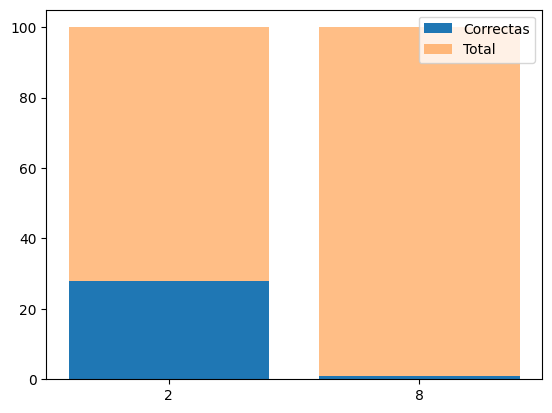

In [26]:
# Listamos las imágenes
images = list_images()
images_5 = list_images(ANOTHER_FOLDER_PATH)
total = len(images)

predictions = []
predictions_8 = []

# Predecimos si las imágenes son 2 o no
for image in images:
  predictions.append(predict(image, h))

for image in images_5:
  predictions_8.append(predict(image, h, ANOTHER_FOLDER_PATH))

# Hacemos un conteo de imagenes
count = np.sum(predictions)
count_8 = np.sum(predictions_8)

print('Imagenes correctas de 2:', count)
print('Imagenes correctas de 8:', count_8)
print('Total imagenes en un set:', total)

# Hacemos un grafico de barras
plt.bar(['2', '8'], [count, count_8])
plt.bar(['2', '8'], [total-count, total-count_8], alpha=0.5, bottom=[count, count_8])
plt.legend(['Correctas', 'Total'])
plt.show()

